# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# Your work here.
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


# Q1 - Is the distribution of body temperatures normal?

We'll perform both graphical and quantiative tests to check if the dataset is normally distributed

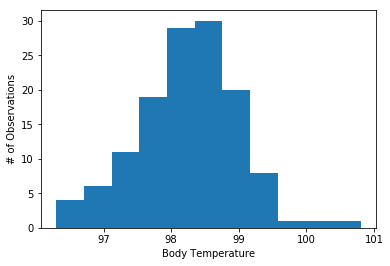

In [3]:
#Checking to see if distribution of body temperatures normal follow a normally distributed bell curve
n_bins = int(np.sqrt(len(df.temperature)))

_ = plt.hist(df.temperature, bins = n_bins)
_ = plt.xlabel("Body Temperature")
_ = plt.ylabel("# of Observations")
plt.show()

Graphically plotting the dataset shows that the data is normally distributed

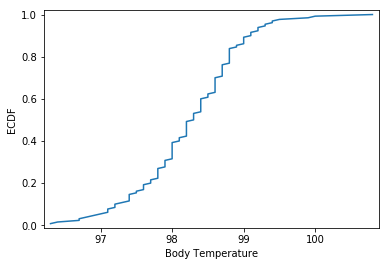

('Check to see that 68% of observations fall below a temp of: ', 98.97958854813581)
('Check to see that 95% of observations fall below a temp of: ', 99.70994632704085)
[98.6 99.3]


In [4]:
#Conducting additional quantitative tests to see if dataset is indeed normally distributed

def ecdf(data):
    n = float(len(data))
    #x-data for the ECDF
    x = np.sort(data)
    #y-data for the ECDF
    y = np.arange(1, n+1) / n
    
    return x, y

x_temp, y_temp = ecdf(df["temperature"])
mean_temp = np.mean(df["temperature"])
stdev_temp = np.std(df["temperature"])

_ = plt.plot(x_temp, y_temp)
_ = plt.xlabel("Body Temperature")
_ = plt.ylabel("ECDF")
plt.margins(0.02)
plt.show()


print("Check to see that 68% of observations fall below a temp of: ", mean_temp + stdev_temp)
print("Check to see that 95% of observations fall below a temp of: ", mean_temp + 2*stdev_temp)
print(np.percentile(df["temperature"], [68,95]))


# Q2 - Is the sample size large? Are the observations independent?

Check to see if sample size is larger than 30

In [5]:
#Checking to see if sample size is large?
if (len(df["temperature"]) > 30):
    print("Sample Size is Large (aka n > 30)")
else:
    print("Sample Size is Too Small (aka n <30)")

Sample Size is Large (aka n > 30)


In [6]:
#Checking to see if observations are independent?

Assume observations are independent given previous tests and assumptions

# Q3 - Is the true population mean really 98.6 degrees F?

We will perform hypothesis testing with the following null hypothesis:
Null Hypothesis: The true population mean is really 98.6 degrees F

In [7]:
#First, we will try a bootstrap hypothesis test

#Creating helper functions for bootstrapping method
def bootstrap_replicate_1d(data, func):
    #Generating bootstrap replicate of 1-d data
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size = 1):
    #Initializing array of replicates
    bs_replicates = np.empty(size)
    
    #Generating replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    
    return bs_replicates

#Getting difference from mean
diff_obs = np.mean(df["temperature"]) - 98.6

#Getting boostrap replicates
bs_replicates = draw_bs_reps(df["temperature"], np.mean, size = 10000)
#Calculating mean of distribution of means
bs_mean = np.mean(bs_replicates)
#Calculating standard deviation of distribution of means
bs_std = np.std(bs_replicates) / np.sqrt(len(bs_replicates))
#Calculating 95% percentile
conf_int = np.percentile(bs_replicates, [2.5,97.5])

print("mean:", bs_mean)
print("standard deviation:", bs_std)
print("95% confidence interval:", conf_int)

#testing null hypothesis
p_value = np.sum(bs_replicates <= diff_obs) / len(bs_replicates)
print("P value is:", p_value)

('mean:', 98.24921238461539)
('standard deviation:', 0.0006368665772408766)
('95% confidence interval:', array([98.12384615, 98.37155769]))
('P value is:', 0)


We will perform a one-sample test because we have a sample and a population mean. We will also use the t-statistic because we have a sample size greater than 30

In [8]:
#Next, we will use a one-sample test and look at both the t-statisic and z-statistic and see why they are different

#Import relevant packages
from statsmodels.stats.weightstats import ztest
from scipy.stats import ttest_1samp

t_test = ttest_1samp(df["temperature"], 98.6)
z_test = ztest(x1 = df["temperature"], value = 98.6)

print("t-statistic:", t_test)
print("z-statistic:", z_test)



('t-statistic:', Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07))
('z-statistic:', (-5.4548232923645195, 4.9021570141012155e-08))


As we can see, the p-values for both the t-test and z-test are low. 

Specifically, our t-statistic of -5.45 indicates that we would observe a mean of 98.6 at 5.45 standard deviations from our sample mean. Our P-value of 2.41-07 also indicates that there is a very low proability of observing a body temerature of 98.6 or greater.

As we increase our sample size, our t-test will converge to yield a similar result as a z-test.

Similarly, our z-statistic of -5.45 indicates that a population mean of 98.6 is observed in 5 standard deviations out from our population mean. 

The difference between the t-statistic and z-statistic is that the z-statistic's P-value is significantly smaller, suggesting an even smaller probability that we observe a population mean greater than 98.6

# Q4 - Drawing a small sample of size 10 from the data and repeat both frequentist tests

Which one is the correct one to use?
What do you notice? What does this tell you about the difference in application of the  𝑡  and  𝑧  statistic?

Since the sample size is only 10, the z-statistic would be more appropriate

In [9]:
#Getting a randon sample size of 10
small_sample = np.random.choice(df["temperature"], size = 10)

#Performing z-test and t-test
small_sample_z_test = ztest(x1 = small_sample, value = 98.6)
small_sample_t_test = ttest_1samp(small_sample, 98.6)

print(small_sample_z_test)
print(small_sample_t_test)

(-1.5506708718073225, 0.12098057839590058)
Ttest_1sampResult(statistic=-1.5506708718073225, pvalue=0.15539333260430352)


As we can see, p-values are much larger when the sample size is only 10 so we are less confident to reject the null hypothesis.

# Q5 - At what temperature should we consider someone's temperature to be "abnormal"?

In [10]:
#First we will try the bootstrapping method
bs_replicates = draw_bs_reps(df["temperature"], np.mean, 10000)
conf_int_bs = np.percentile(bs_replicates, [2.5, 97.5])
print(conf_int_bs)

[98.12384615 98.37230769]


In [11]:
#Then we will try frequentist method
from scipy.stats import norm
import math

z_value = 1.96
mean = np.mean(df["temperature"])
st_dev = np.std(df["temperature"])
std_err = st_dev / math.sqrt(len(df["temperature"]))
margin_of_err = z_value * std_err
conf_int_frequentist  = (mean - margin_of_err, mean + margin_of_err)
print(conf_int_frequentist)

(98.12367980442819, 98.37478173403336)


Regardless of approach, we can confidently consider any temperature under 98.123 or above 98.374 to be "abnormal"

# Is there a significant difference between males and females in normal temperature?

We'll check to see if there's a significant difference between genders both visually and quantitatively 

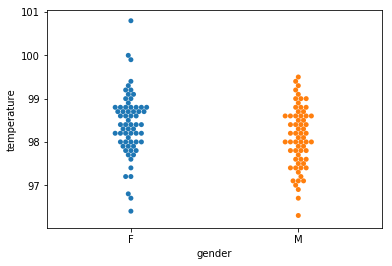

In [12]:
#Using seaborn to visually see differences
import seaborn as sns
sns.swarmplot(x = "gender", y = "temperature", data = df)
plt.show()

Since the swarmplot isn't too meaningful, we'll try using the ECDF approach

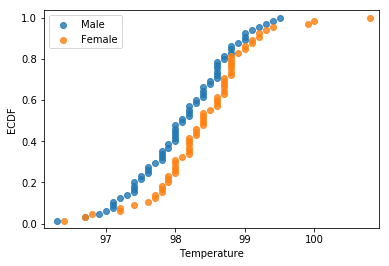

In [13]:
#Defining new ecdf function
def plot_ecdf_multi(df_1, df_2, xlabel, legend):
    x1, y1 = ecdf(df_1)
    sns.regplot(x = x1, y = y1, fit_reg = False)
    x2, y2 = ecdf(df_2)
    sns.regplot(x = x2, y = y2, fit_reg = False)
    
    _ = plt.xlabel(xlabel)
    _ = plt.ylabel("ECDF")
    _ = plt.legend(legend)
    plt.margins(0.02)
    plt.show()
    
male_df = df[df.gender == "M"]["temperature"]
female_df = df[df.gender == "F"]["temperature"]

plot_ecdf_multi(male_df, female_df, xlabel = "Temperature", legend = ("Male", "Female"))

As we can see from the ECDF and the swarmplot (albeit to a lesser extent), male temperatures seem to be lower. 

We will now use statistical testing to see if this difference is statistically significant

In [14]:
#Conducting the T-test for the means of two independent samples of scores
from scipy import stats
stats.ttest_ind(male_df, female_df)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.02393188312239561)

Since the p-value is 2.4%, we can reject the null hypothesis. There is a significant difference between males and females in "average" temperatures

# Conclusion 

Body Temperatures are normally distributed. When testing to see if the true population mean of body temperatures is 98.6 F degrees, we found that this is statistically not true. Instead, we can say with 95% confidence that the true mean body temperature falls between 98.123 and 98.374 degrees F. Finally, we also can say that there is a significant difference between males and females in normal body temperature.
